In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
sns.set("notebook")
plt.rcParams["figure.figsize"] = (15,6)

In [2]:
acc_df = pd.read_sql_table('account', 'sqlite:///app.db', index_col='id')
agent_df = pd.read_sql_table('agent', 'sqlite:///app.db', index_col='id')
cat_df = pd.read_sql_table('category', 'sqlite:///app.db', index_col='id')
cur_df = pd.read_sql_table('currency', 'sqlite:///app.db', index_col='id')
tr_df = pd.read_sql_table('transaction', 'sqlite:///app.db', index_col='id')

In [3]:
tr_df['date_issued'] = pd.to_datetime(tr_df['date_issued'], format="%Y-%m-%d %H:%M:%S.%f")
acc_df['date_created'] = pd.to_datetime(acc_df['date_created'], format="%Y-%m-%d %H:%M:%S.%f")
tr_df['time'] = tr_df['date_issued'].dt.hour * 60 + tr_df['date_issued'].dt.minute
tr_df['category'] = tr_df.category_id.map(cat_df.desc)
tr_df['account'] = tr_df.account_id.map(acc_df.desc)
tr_df['currency'] = tr_df.account_id.map(acc_df.currency_id).map(cur_df.code)
tr_df['agent'] = tr_df.agent_id.map(agent_df.desc)

In [4]:
import viz

In [5]:
unique = tr_df.category.unique()
l = len(unique)
colors = sns.color_palette([list(sns.color_palette("bright", 10))[i] for i in [0, 1, 3, 4, 9]][:min(5, l)]
         + list(sns.color_palette("colorblind", 10))[:min(max(0, l-5), 10)]
         + list(sns.color_palette("husl", max(0, l-15)))[:max(0, l-15)])
display(colors)
print(len(colors))
unique = sorted(unique, key=lambda c: tr_df.category.value_counts()[c], reverse=True)
print(", ".join(unique))
colors = dict(zip(unique, colors))

[(0.00784313725490196, 0.24313725490196078, 1.0),
 (1.0, 0.48627450980392156, 0.0),
 (0.9098039215686274, 0.0, 0.043137254901960784),
 (0.5450980392156862, 0.16862745098039217, 0.8862745098039215),
 (0.0, 0.8431372549019608, 1.0),
 (0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784),
 (0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 (0.8369430560927636, 0.5495828952802333, 0.1952683223448124),
 (0.6430915736746491, 0.6271955086583126, 0.19381135329796756),
 (0.3126890019504329, 0.6928754610296064, 0.1923704830330379),
 (0.20582072623426667, 0.6842209016721069, 0.5675558225732941),
 (0.2151139535594307, 0.6700707833028816, 0.7112365203426209),
 (0.23299120924703914, 0.639586552066035, 0.9260706093977744),
 (0.731751635642941, 0.5128186367840487, 0.9581005178234921),
 (0.9614880299080136, 0.3909885385134758, 0.8298287106954371)]

24
Base, Eating Out, Snacks, Transportation, Ausgang, Lebensmittel, Miscellaneous, Rückzahlung Income, Personal, Kontoübertrag, Lohn, Gifts, Kontoübertrag Income, Gifted, Entertainment, Trinkgeld, Kleidung, Stay, Travel, Education, Leihen, Geliehen, Rückzahlung Expense, Not Indexed


In [6]:
viz.overview.month_overview(tr_df, "12.20", palette=colors)

In [7]:
viz.overview.overview(viz.select.select(tr_df), 'CHF', palette=colors)

In [8]:
viz.overview.overview(viz.select.select(tr_df, currency='JPY'), 'JPY', lim=5000, palette=colors)

In [9]:
viz.overview.overview(viz.select.select(tr_df, currency='EUR'), 'EUR', palette=colors)

In [33]:
type(viz.select.select(tr_df, exp=1).groupby('category')['amount'].sum())

pandas.core.series.Series

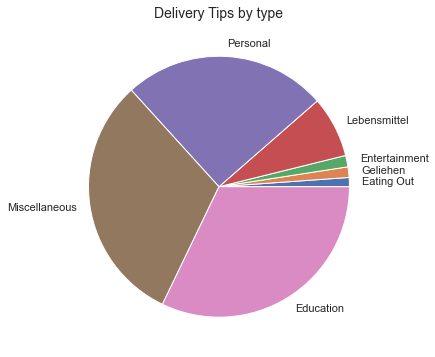

In [36]:
pie, ax = plt.subplots(figsize=[10,6])
sums = viz.select.select(tr_df, exp=1, date_start="2020-12-01").groupby('category')['amount'].sum()
sums = sums[sums.index != "Kontoübertrag"].sort_values(axis=0)
plt.pie(x=sums, labels=sums.keys())
plt.title("Delivery Tips by type", fontsize=14);